In [31]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


LOGDIR = Path(
    '/home/michal/studia/machine_learning_lab/'
    'NEAT/experiments/scripts/logs_neat_openai/'
)


def load_logs(logdir):
    paths = logdir.rglob('*population.csv')
    dfs = []
    for path in paths:
        df = pd.read_csv(path)
        df['env'] = path.parent.parent.stem
        df['start_time'] = path.parent.stem
        dfs.append(df)

    return pd.concat(dfs)


def plot_environment(group):
    plt.figure(figsize=(12, 7))
    plt.title(group.name)
    sns.lineplot(
        x='generation',
        y='fitness',
        hue='start_time',
        data=group,
        estimator='mean',
    )
    plt.show()

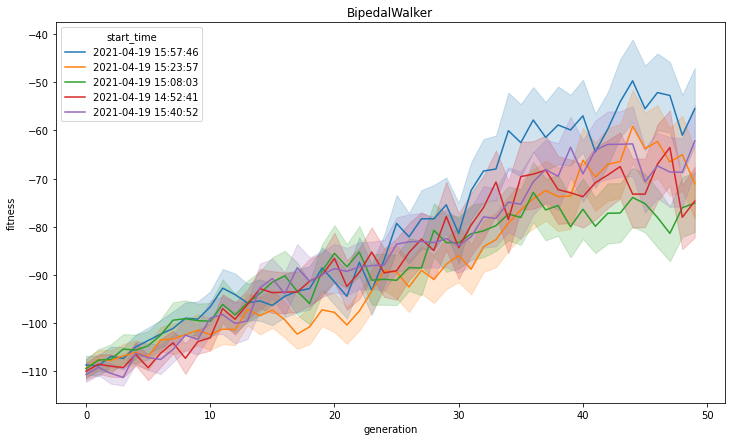

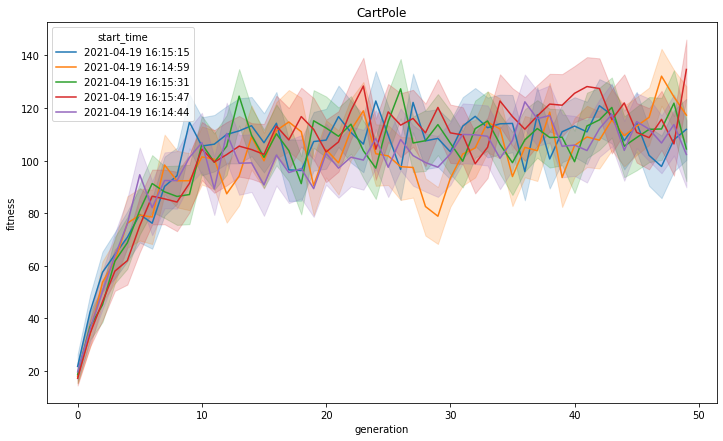

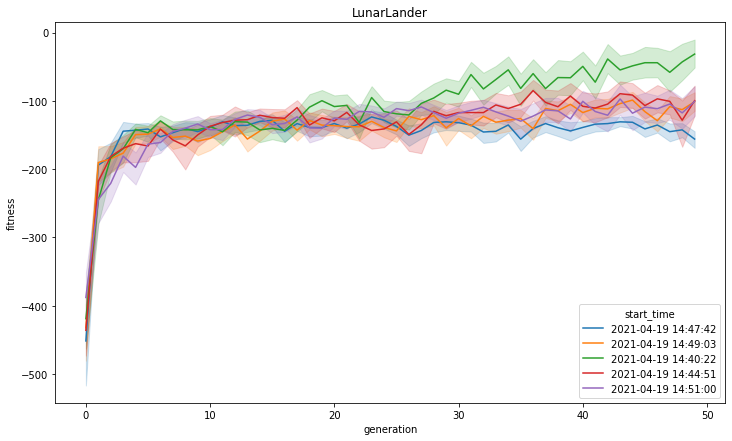

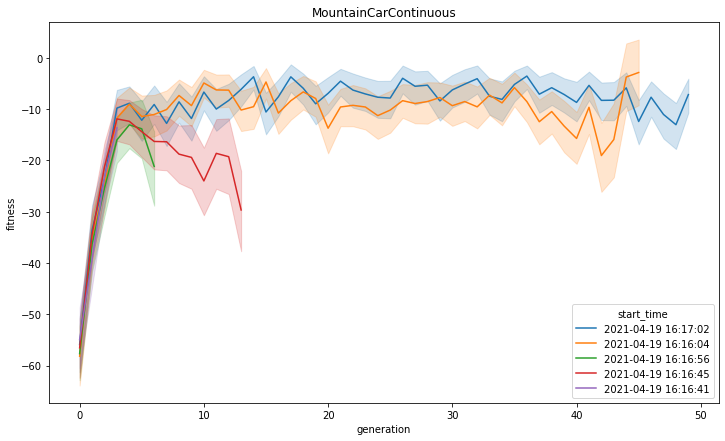

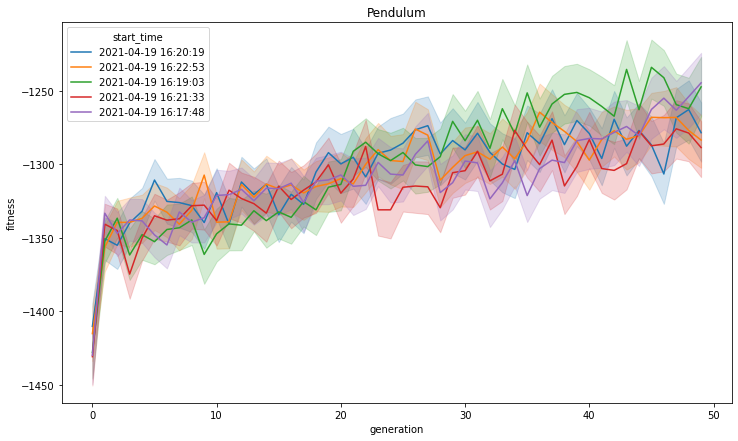

""


In [32]:
df = load_logs(LOGDIR)
df.groupby('env').apply(plot_environment)